In [269]:
from sympy import *
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
x = symbols("x")

In [136]:
def make_q(n):
    q = Integer(1).as_poly(x)
    i = n - 1
    while i >= 1:
        factor = (1 + i*i*x*x).as_poly(x)
        q = q * factor
        i -= 2
    return q

In [138]:
def make_tanh_up_to(degree):
    i = 1
    t = Integer(0).as_poly(x)
    while 2 * i - 1 <= degree:
        coef = Integer(2)**(2*i) * ((Integer(2) ** (2*i)) - 1) * bernoulli(2*i) / factorial(2*i)
        exp = 2*i - 1
        term = coef * (x ** exp)
        t = t + term
        i += 1
    return t

def make_tanh_pi_over_2x_up_to(degree):
    i = 1
    t = Integer(0).as_poly(1/x)
    while 2 * i - 1 <= degree:
        coef = Integer(2)**(2*i) * ((Integer(2) ** (2*i)) - 1) * bernoulli(2*i) / factorial(2*i)
        exp = 2*i - 1
        term = coef * ((pi/(2*x)) ** exp)
        t = t + term
        i += 1
    return t

def calc_A_n_1(n):
    if n % 2 == 0:
        q = make_q(n)
        t = make_tanh_pi_over_2x_up_to(n)
        prod = q * t
        # Now convert to an expression to cancel the x's and (1/x)'s
        prod_expr = prod.as_expr()
        return N(prod_expr.coeff(x), maxn=1000)
    else:
        assert false

def calc_limiting_vertices(d):
    return np.pi * calc_A_n_1(d)

Best line fit parameters a, b are [ 3.02946334 -1.91526572]
Estimated covariance of the parameters is [[ 5.54984116e-05 -1.79553886e-04]
 [-1.79553886e-04  6.97393140e-04]]


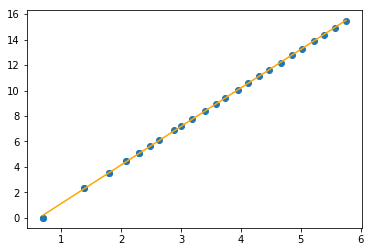

In [317]:
# Test our setup on the known case where k = 2.

# Calculate some A[d, 2] values for d between 1 and 300.
test_points = list(np.linspace(2, 10, 10)) + list((np.logspace(1, 2.5, 20)))
test_points = list(map(int, test_points))
# Make sure the dimensions tested are even (for the next example).
test_points = [p if p % 2 == 0 else p + 1 for p in test_points]
A_d2s = []
for d in test_points:
    q = make_q(d)
    A_d2s.append(float(q.coeff_monomial(x**2)))

def linear(x, a, b):
    return a * x + b

# Make a log-log plot.
log_test_points = np.log(test_points)
log_As = np.log(A_d2s)
plt.scatter(log_test_points, log_As)

# Line fit to this plot has a slope very close to 3, corroborating known O(d^3) result.
popt, pcov = curve_fit(linear, log_test_points, log_As)
print("Best line fit parameters a, b are " + str(popt))
print("Estimated covariance of the parameters is " + str(pcov))
plt.plot(log_test_points, linear(log_test_points, *popt), color="orange")

Best line fit parameters a, b are [1.47199325 0.49923015]
Estimated covariance of the parameters is [[ 1.20549103e-05 -3.90012232e-05]
 [-3.90012232e-05  1.51482013e-04]]


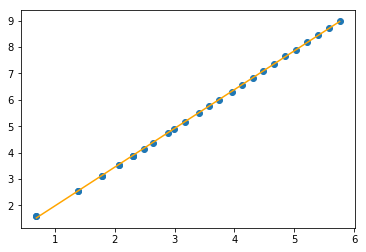

In [318]:
# Now the case we're interested in:
# The limiting expected number of vertices pi * A[d, 1].

# Make sure the dimensions tested are even.
vertices_results = [float(calc_limiting_vertices(p)) for p in test_points]

# Make a log-log plot.
log_vertices_results = np.log(vertices_results)
plt.scatter(log_test_points, log_vertices_results)

# Line fit to this plot has a slope very close to 3/2, corroborating  O(d^{3/2}) conjecture.
popt2, pcov2 = curve_fit(linear, log_test_points, log_vertices_results)
print("Best line fit parameters a, b are " + str(popt2))
print("Estimated covariance of the parameters is " + str(pcov2))
plt.plot(log_test_points, linear(log_test_points, *popt2), color="orange")
